## Análisis de Clustering de Asteroides Cercanos a la Tierra

*Descripción del Proyecto*

Este proyecto utiliza datos de la NASA obtenidos a través del servicio web NeoWs (Near Earth Object Web Service), para identificar y analizar grupos (clusters) de asteroides basándose en sus características físicas y orbitales.

*Fuentes de Datos*

Los datos han sido recolectados de la API abierta de la NASA, específicamente de NeoWs. Esta API proporciona información detallada sobre los asteroides cercanos a la Tierra. Puede accederse a más información y documentación de la API aquí: NASA NeoWs.


#### Características del DataSet
- Dimensiones: 4687 filas × 40 columnas
- Tamaño del Archivo: 2.4 MB
- Tipos de Datos:
  - ID: 2 columnas
  - Continuas: 30 columnas
  - Categóricas: 2 columnas
  - DateTime: 2 columnas
  - Nominal: 1 columna
- Formato de Datos: Datos transformados disponibles en formato CSV.

### Importación de Librerías y Datos

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
import warnings
warnings.filterwarnings("ignore")

# seed fixing
SEED = 42 # Para reproducibilidad

In [65]:
# Montar Google Drive y cargar el dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/datasets/nasa.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


#### Exploración y Preparación de los Datos

In [66]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


#### Conversión de Fechas
Las columnas de fechas en el dataset original están en formato de texto, lo que requiere una conversión a datetime para un manejo más eficaz en análisis posteriores.

Y vemos el cambio con `info()`

In [67]:
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

### Visualización de Datos Faltantes

Utilizamos la biblioteca `missingno` para visualizar la presencia de valores faltantes en el dataset, lo que facilita la identificación de patrones de ausencia de datos.

<Axes: >

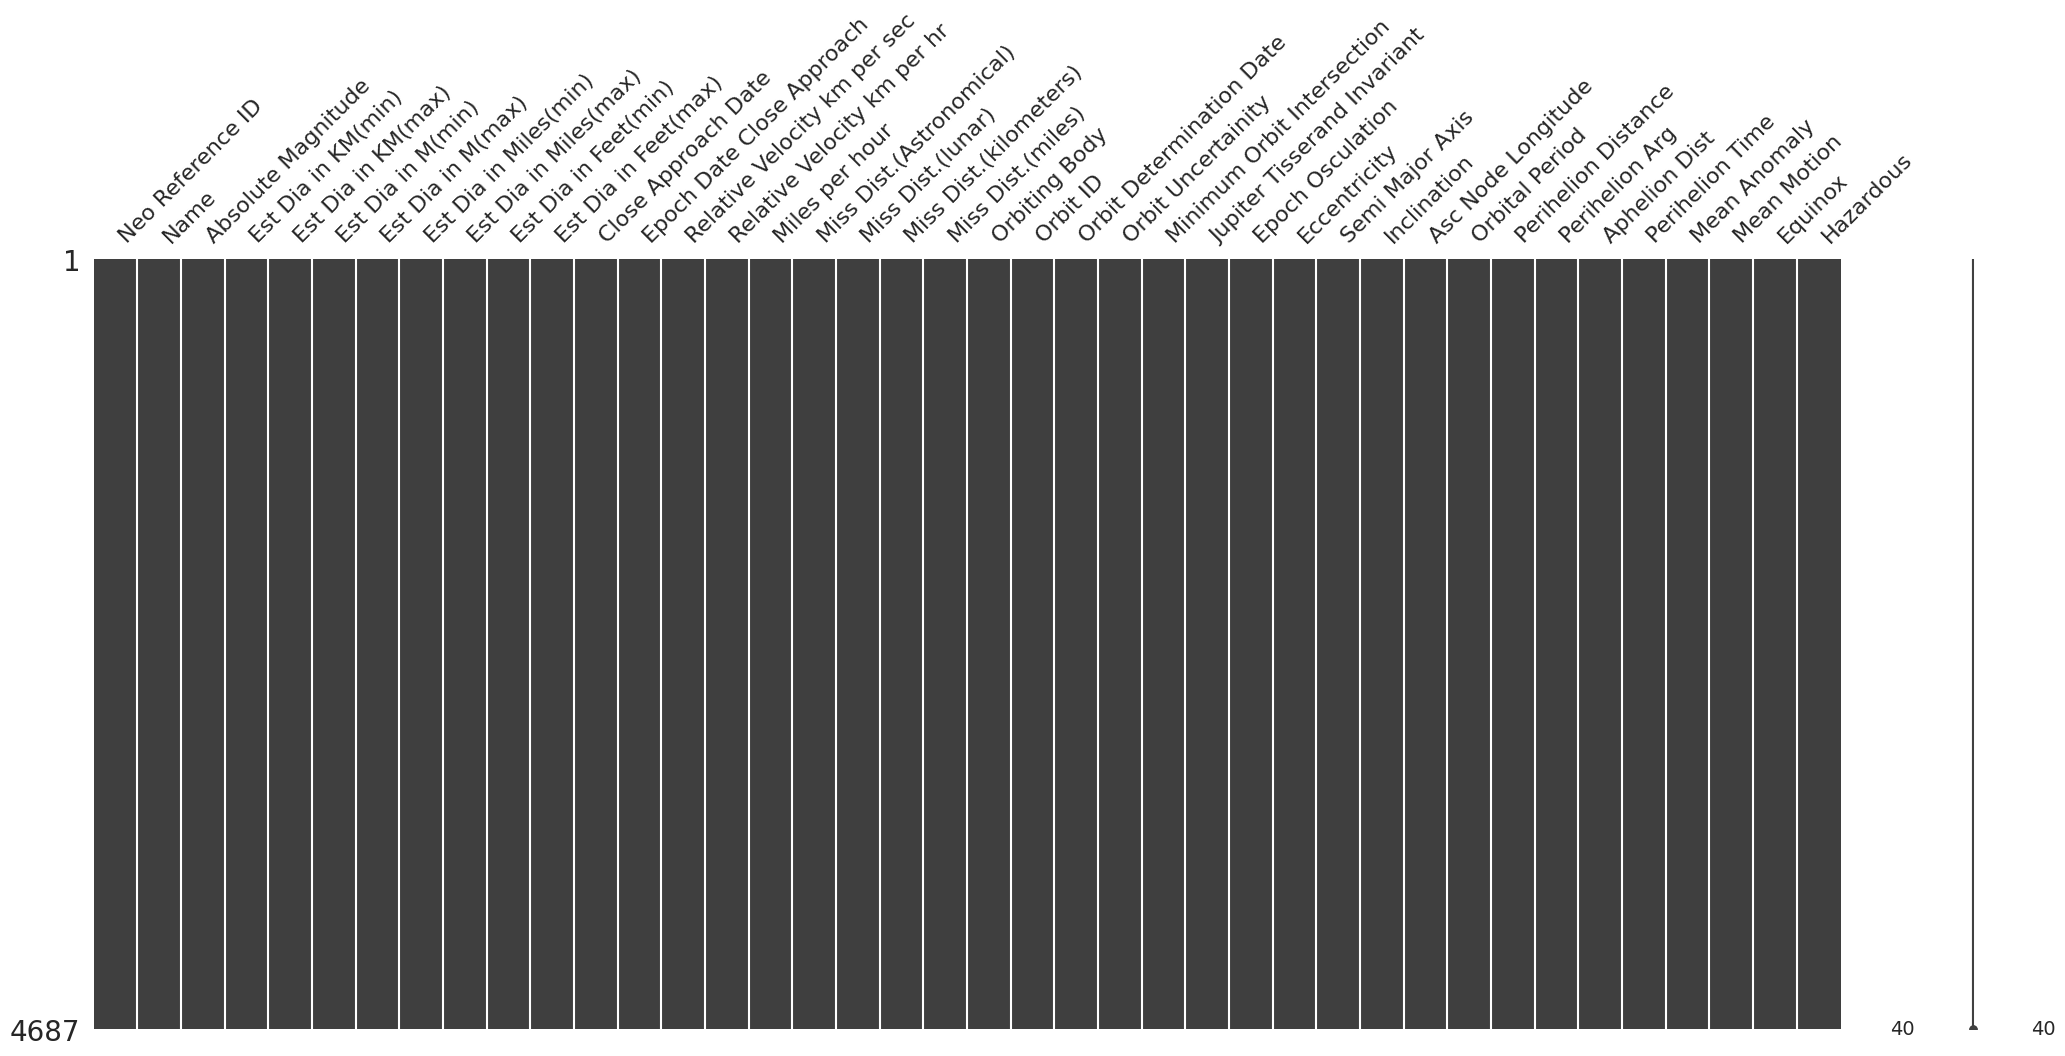

In [68]:
import missingno as msno

msno.matrix(df)

### Codificación de Variables Categóricas
Convertimos las variables categóricas en formatos numéricos para su uso en análisis. En particular, transformamos la columna 'Hazardous' que indica si un asteroide es peligroso.

Luego realizamos una limpieza de datos, eliminando las olumnas que no son necesarias para el análisis debido a su naturaleza categórica no variante o redundancia.



In [69]:
encoder = LabelEncoder()

df['hazardous'] = encoder.fit_transform(df.Hazardous)

# Dropping these categorical features since they are repeated among all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis = 1)

### Revisión de Longitud de Columnas
Para asegurar que todas las filas tengan datos completos post-transformación, revisamos la longitud de cada columna.

In [70]:
for col in df.columns:
    print('Length of column'+" "+col+"=",len(df[col]))

Length of column Neo Reference ID= 4687
Length of column Name= 4687
Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Est Dia in M(min)= 4687
Length of column Est Dia in M(max)= 4687
Length of column Est Dia in Miles(min)= 4687
Length of column Est Dia in Miles(max)= 4687
Length of column Est Dia in Feet(min)= 4687
Length of column Est Dia in Feet(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Relative Velocity km per hr= 4687
Length of column Miles per hour= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Miss Dist.(lunar)= 4687
Length of column Miss Dist.(kilometers)= 4687
Length of column Miss Dist.(miles)= 4687
Length of column Orbit ID= 4687
Length of column Orbit Determination Date= 4687
Length of column Orbit Uncertainity= 4687
Length of colum

Podemos observar que no faltan datos ni hay valores nulos en los datos recogidos. Además, la longitud de cada columna es la misma.

## Matriz de Correlación

Una matriz de correlación se utiliza para investigar la dependencia entre múltiples variables al mismo tiempo. El resultado es una tabla que muestra los coeficientes de correlación entre variables. Cada celda en la tabla muestra la correlación entre dos variables. El valor está en el rango de -1 a 1. Si dos variables tienen una alta correlación, pueden tener un comportamiento similar y, por lo tanto, pueden contener información redundante.


- Correlación Positiva: Dos variables pueden estar positivamente correlacionadas entre sí. Significa que cuando el valor de una variable aumenta, el valor de la(s) otra(s) variable(s) también aumenta (también disminuye cuando la otra disminuye).

- Correlación Negativa: Dos variables pueden estar negativamente correlacionadas entre sí. Esto ocurre cuando el valor de una variable aumenta y el valor de otra(s) variable(s) disminuye (inversamente proporcional).

- Sin Correlación: Dos variables pueden no tener ninguna relación entre sí. Esto ocurre cuando se cambia el valor de una variable y el valor de la otra no se ve afectado.


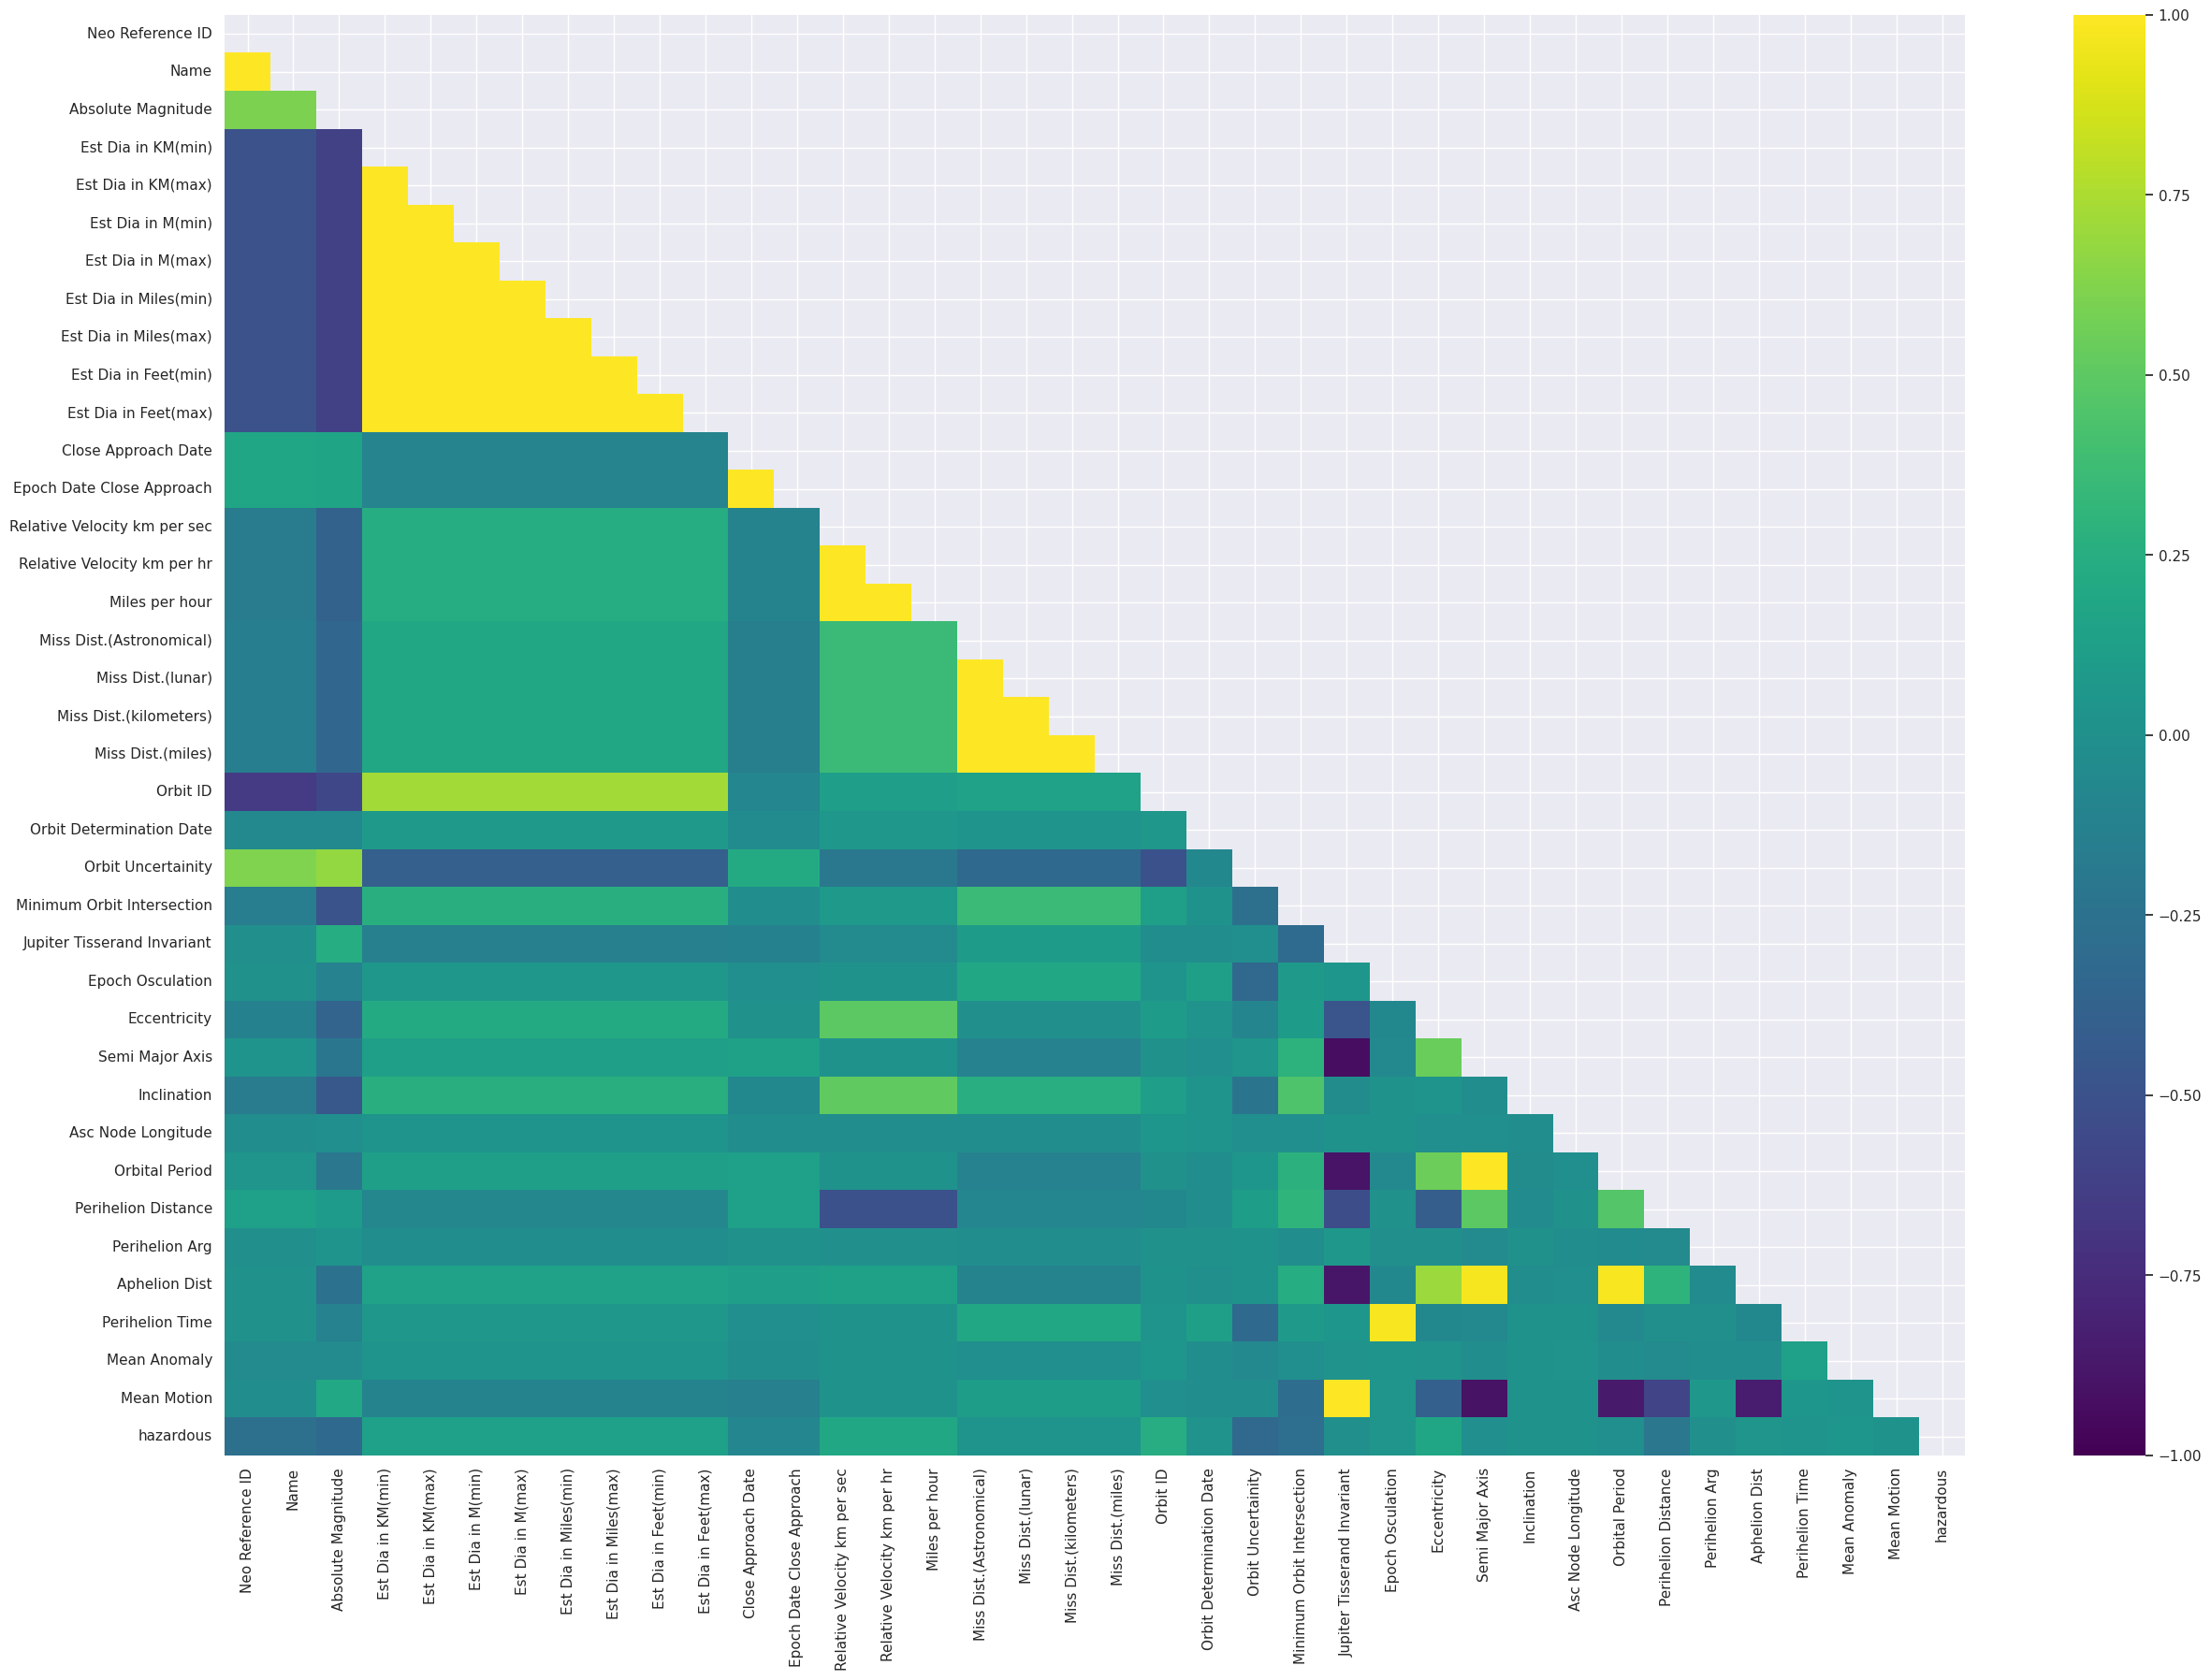

In [71]:
# Configuramos el tamaño de la figura para las visualizaciones. Y mostramos la matriz de correlación para todas
# las características del DataFrame. Esta visualización ayuda a identificar correlaciones fuertes entre características
# Fundamental para decidir qué columnas eliminar para reducir la dimensionalidad
sns.set(rc={'figure.figsize':(30,20)})

mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="viridis", mask = mask)
plt.show()
plt.close()

### Limpieza de Datos Basada en Correlación
Eliminar las columnas redundantes o altamente correlacionadas para mejorar la eficiencia de los algoritmos de aprendizaje automático y reducir el riesgo de multicolinealidad, especialmente en modelos de regresión.

- Multicolindealidad
Se refiere a la alta correlación entre dos o más variables explicativas, es decir, predictoras.

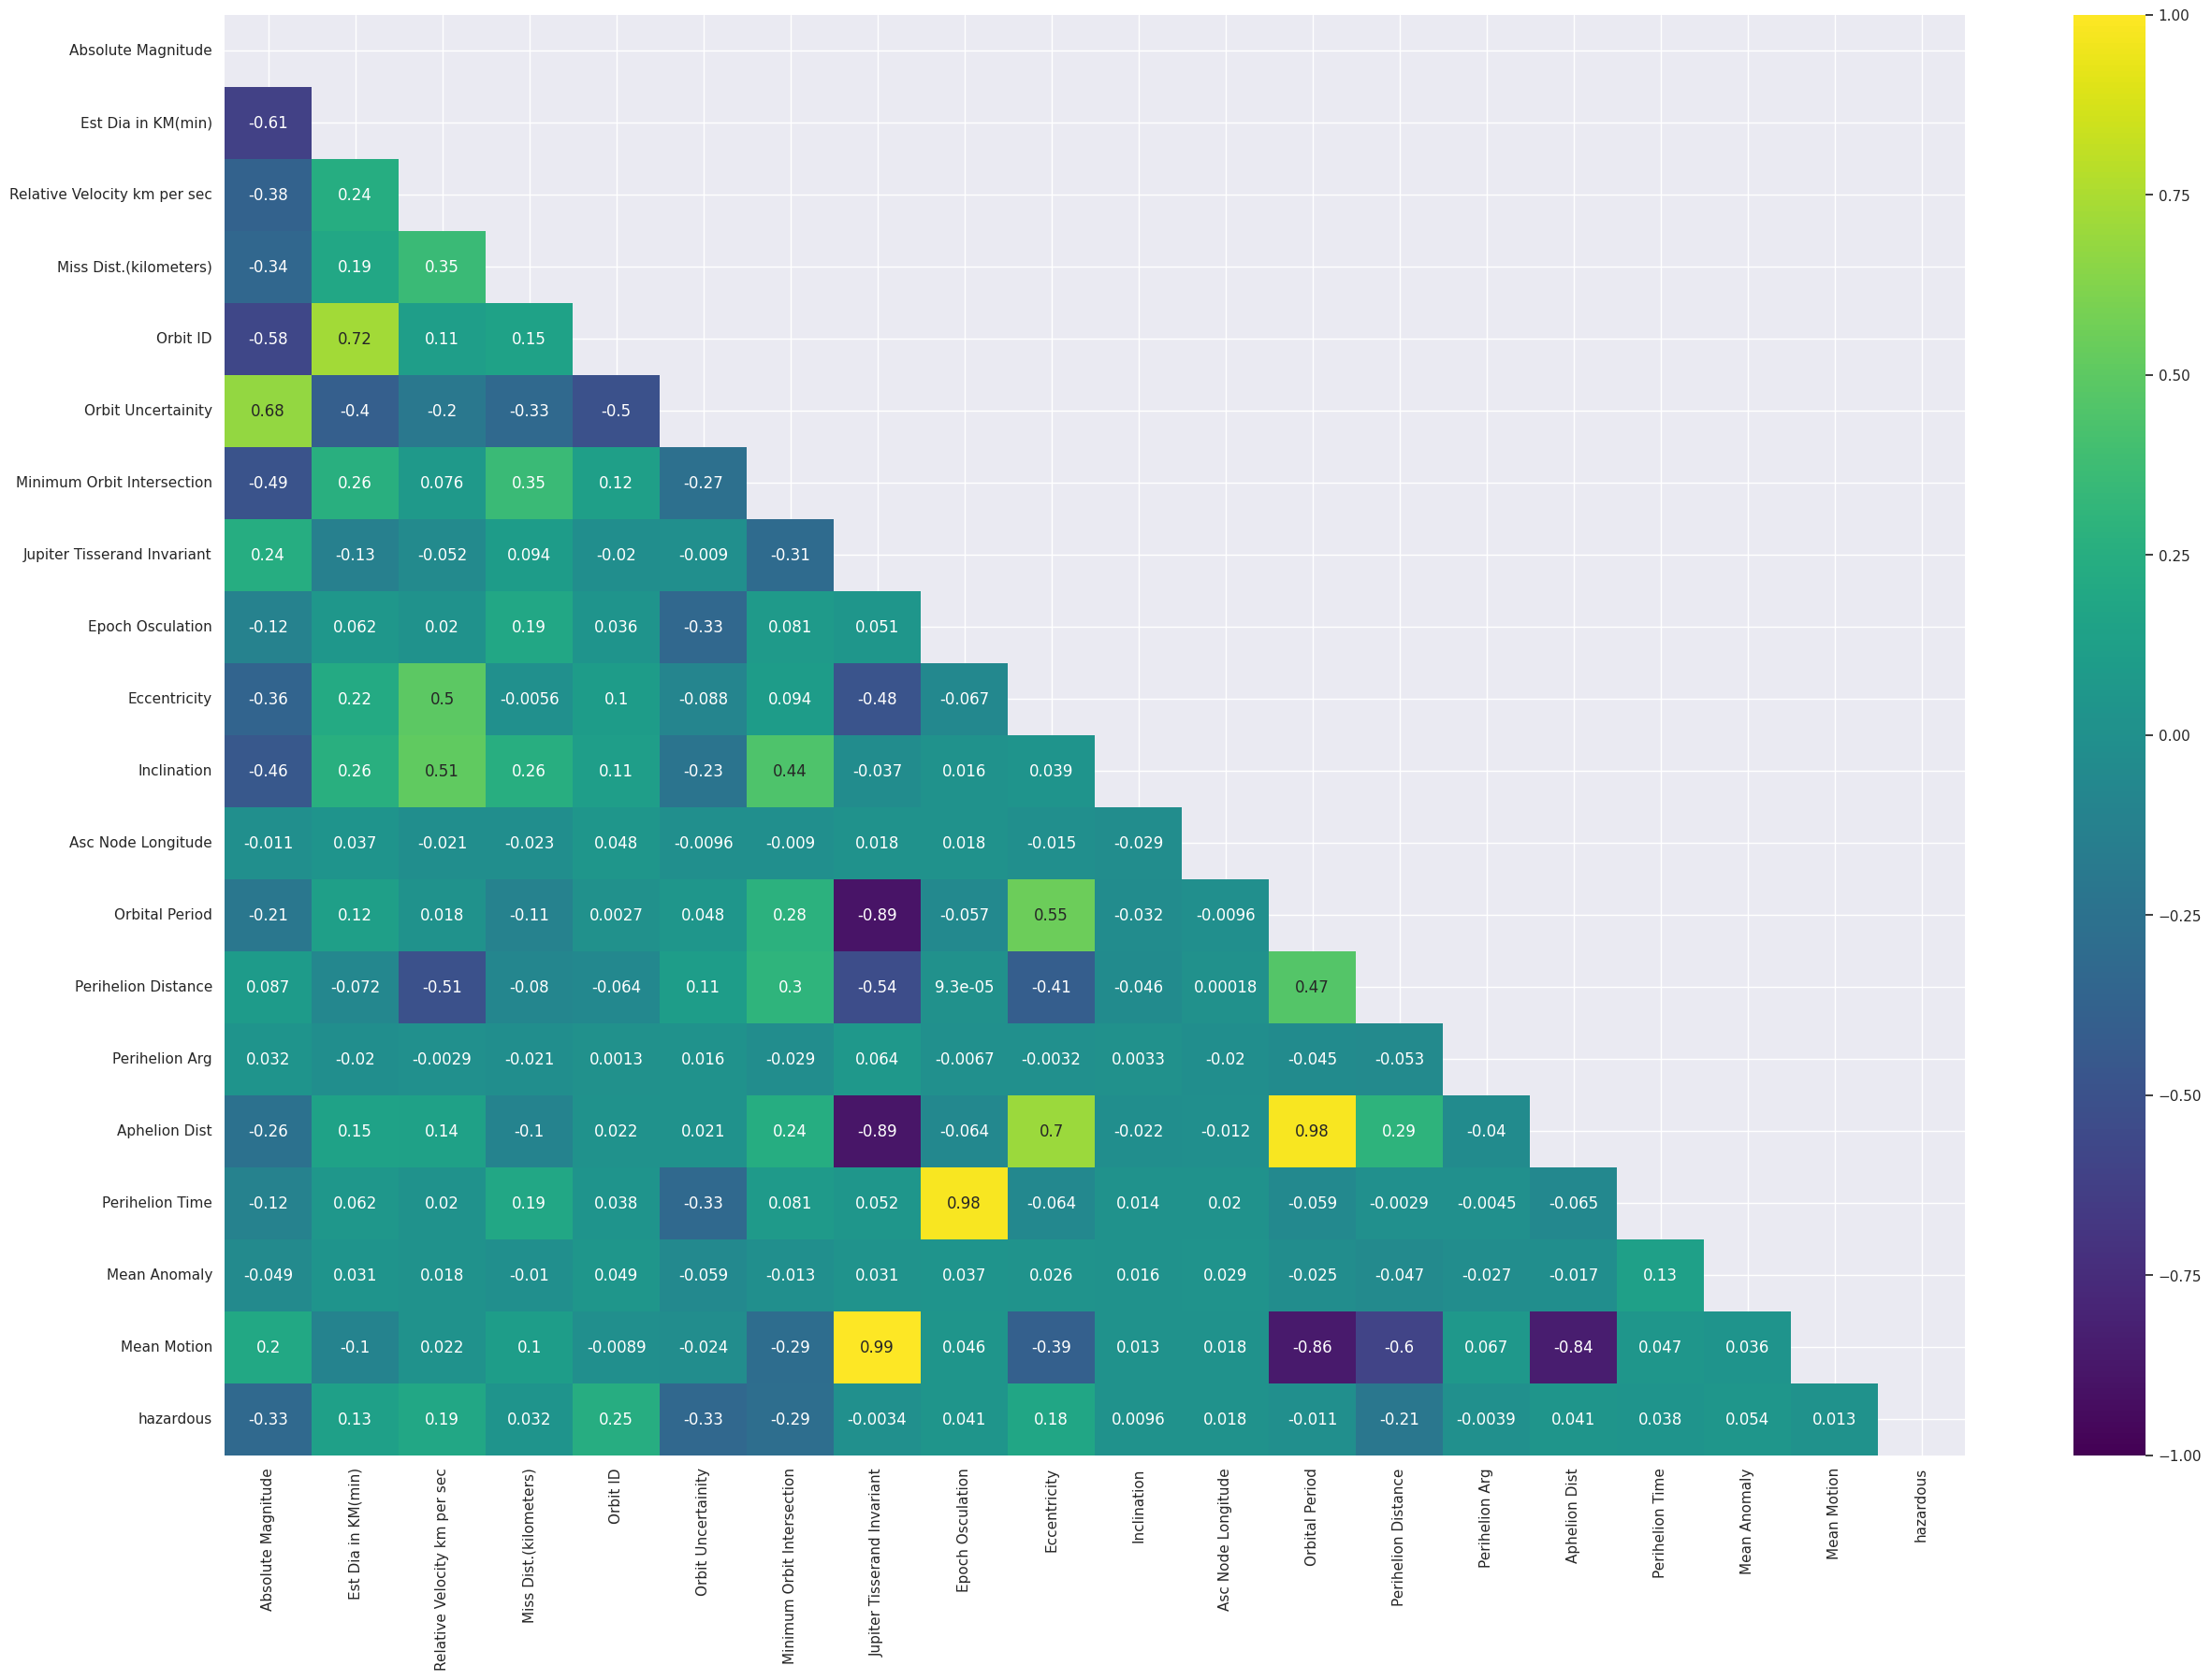

In [72]:
# Eliminamos columnas por redundancia, alta correlación e irrelevancia
# Entre las razones están:
# Redundancia: Algunas características solo difieren por la unidad de medida utilziada.
# Irrelevancia: Eliminación de identificadores, fechas y nombres ya que no son relevantes para el modelado
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)


mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="viridis", mask = mask, annot=True)
plt.show()
plt.close()

La etiqueta 'Hazardous' se mantiene en la matriz de correlación porque es fundamental para entender cómo las otras variables se relacionan con el potencial peligro que representan estos objetos cercanos a la Tierra. Aunque en el clustering no se utiliza directamente la etiqueta como parte del aprendizaje, puede ser útil para análisis exploratorios adicionales o para verificar la cohesión de los grupos formados con respecto a características peligrosas.

1. **Est Dia in KM(min)**: Estimación del diámetro mínimo del asteroide en kilómetros.
    
2. **Relative Velocity km per sec**: Velocidad relativa del asteroide en relación a la Tierra, medida en kilómetros por segundo.
    
3. **Miss Dist.(kilometers)**: La distancia mínima a la que el asteroide pasará de la Tierra, medida en kilómetros.
    
4. **Orbit ID**: Identificador numérico del cálculo orbital para el asteroide, que puede implicar diferencias en el modelo orbital utilizado.
    
5. **Orbit Uncertainty**: Medida de la incertidumbre en la órbita del asteroide, donde valores más altos indican menor precisión en los cálculos orbitales.
    
6. **Minimum Orbit Intersection**: Distancia mínima de intersección orbital, una medida de cuán cercana pasará la órbita del asteroide respecto a la órbita de la Tierra.
    
7. **Jupiter Tisserand Invariant**: Un parámetro orbital que ayuda a clasificar órbitas de asteroides en relación con Júpiter.
    
8. **Epoch Osculation**: Una "instantánea" de la órbita en un tiempo específico, que sirve como referencia para cálculos orbitales.
    
9. **Eccentricity**: Excentricidad de la órbita del asteroide, una medida de cuán elíptica (en lugar de circular) es la órbita.
    
10. **Inclination**: Inclinación de la órbita del asteroide respecto al plano eclíptico solar.
    
11. **Asc Node Longitude**: Longitud del nodo ascendente; el punto en el que el asteroide cruza el plano eclíptico del sistema solar desde el sur al norte.
    
12. **Orbital Period**: El período orbital del asteroide, medido en años.
    
13. **Perihelion Distance**: La distancia más cercana al Sol en la órbita del asteroide.
    
14. **Perihelion Arg**: Argumento del perihelio, que es el ángulo desde el nodo ascendente hasta el perihelio, medido en el plano de la órbita.
    
15. **Aphelion Dist**: La distancia más lejana del Sol en la órbita del asteroide.
    
16. **Perihelion Time**: Tiempo en el cual el asteroide alcanza su perihelio (el punto más cercano al sol).
    
17. **Mean Anomaly**: Anomalía media en el tiempo de la época osculación.
    
18. **Mean Motion**: Movimiento medio del asteroide, una medida de la velocidad angular en su órbita.
    
19. **Hazardous**: Indicador booleano de si el asteroide representa un potencial peligro para la Tierra.

#### Asignación de Variables

In [73]:
features = df.drop('hazardous', axis = 1).values
target = df['hazardous'].values # Solo para propósitos de validación posterior, no se usa en K-Means

### Estandarización
Antes de aplicar técnicas de clustering como K-Means, es crítico estandarizar las características para asegurar que el modelo no sea sesgado por la escala de los atributos. La estandarización involucra reescalar los datos para que tengan una media (promedio) de cero y una desviación estándar de uno. Esto se realiza porque K-Means es sensible a las escalas de las características debido a que utiliza distancias euclidianas entre puntos de datos.

El proceso de estandarización se puede describir con la siguiente fórmula:

$$
z = \frac{(x - \mu)}{\sigma}
$$

Donde:
- $x$ es el valor original de la característica.
- $\mu$  es la media de la característica.
- $\sigma$ es la desviación estándar de la característica.
- $z$ es el valor estandarizado resultante.

Usamos `StandardScaler` de scikit-learn para realizar la estandarización:

In [74]:
scaler = StandardScaler()

# Eliminamos columnas que no proprocionan información relevanete. El identificador y hazardous.
df = df.drop(['hazardous', 'Orbit ID'], axis = 1)
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.23104209, -0.20941058, -1.07713904, ...,  0.45919023,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557,  0.56814611, ...,  0.07081791,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876, -0.8748918 , ...,  0.41557933,
         1.03940428, -0.52211437],
       ...,
       [ 0.14949337, -0.34623784, -0.92961547, ...,  0.60624482,
         0.20776991, -0.63207867],
       [-0.16185382, -0.23970271, -0.35910064, ...,  0.5933032 ,
         0.2079915 , -0.56766111],
       [-1.09278193,  0.53049632,  3.01353552, ...,  0.62542342,
         0.03397983, -0.54733945]])

Calcula el Score de Silueta para Diferentes Números de Clusters:
Este código evalúa el score de silueta para una gama de números de clusters (de 2 a 9) y te ayuda a visualizar cuál configuración maximiza este score.


### Encontrando el número óptimo de grupos

1. Calculando Scores de Silueta para Diferentes Números de Clusters
Primero, necesitas calcular el score de silueta para una serie de valores de k (número de clusters) para ver cuál ofrece la mejor puntuación. El score de silueta mide cuán similar es un objeto a su propio cluster comparado a otros clusters.

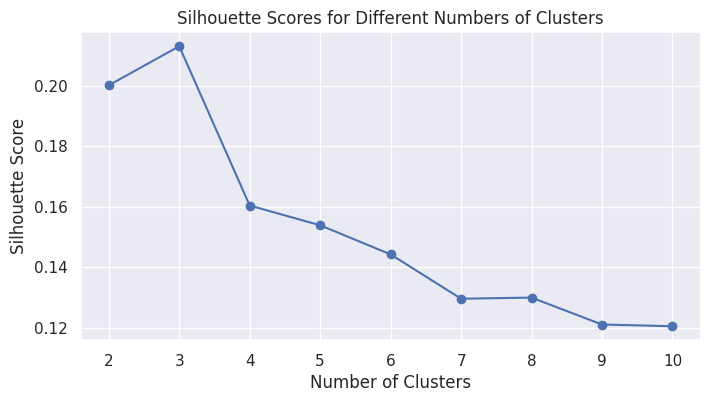

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 11)
silhouette_scores = []

# Calcular el score de silueta para cada número de clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=SEED)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Se observa que el score más alto ocurre con 4 clusters, lo cual sugiere que este es el número óptimo de grupos para este conjunto de datos, dado que los scores disminuyen consistentemente a medida que se aumenta el número de clusters más allá de este punto.

2. Visualización de los Diagramas de Silueta


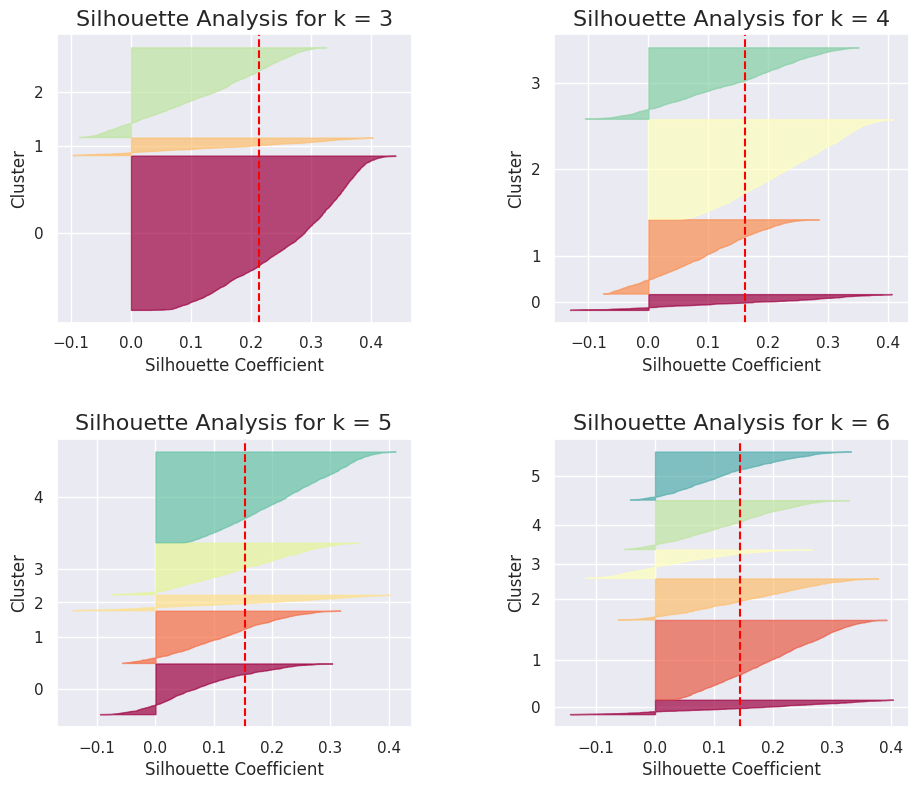

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagrams(df_scaled, range_k):
    fig, axs = plt.subplots(2, 2, figsize=(11, 9))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(df_scaled)
        silhouette_coefficients = silhouette_samples(df_scaled, y_pred)

        silhouette_avg = silhouette_score(df_scaled, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = mpl.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Llama a la función con el rango de k que deseas analizar
plot_silhouette_diagrams(df_scaled, range(3, 7))

### K-Means
Ahora que identificamos un número apropiado de clusters (4), el siguiente paso  sería aplicar el algoritmo K-Means con este número de clusters y luego interpretar los resultados para comprender mejor cómo se agrupan los datos y cuáles son las características comunes dentro de cada cluster.

In [77]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=SEED)
y_pred = kmeans.fit_predict(df_scaled)

# Centros de los clusters
centroids = kmeans.cluster_centers_
print("Centros de Clusters:", centroids)


Centros de Clusters: [[ 4.69016477e-01 -2.61931442e-01 -6.87327880e-02 -7.54473614e-01
   1.24828473e+00 -2.95700581e-01 -2.60551367e-01 -3.46480640e+00
   2.01181564e-01 -3.18302422e-02 -3.97313717e-02  1.89690265e-01
   6.69566496e-02 -2.45838238e-02  2.16694645e-01 -3.39360791e+00
  -1.37427460e-01 -2.55252792e-01]
 [-7.02513034e-01  3.65782434e-01  6.02442789e-01  5.04637907e-01
  -7.24662596e-01  2.08736550e-01  5.76632020e-01  2.12860993e-01
   1.55043157e-01  6.01145187e-01 -5.41406811e-02 -5.93759459e-01
  -7.35309625e-01  4.76322778e-02 -4.89291154e-01  2.11859210e-01
   7.33030481e-02  6.19457924e-01]
 [ 8.01903309e-01 -4.16589251e-01 -5.11117236e-01 -2.58290655e-01
   4.74553993e-01 -4.93824898e-01  4.65135131e-01  2.33937743e-01
  -7.25490879e-01 -4.41103097e-01  4.44757691e-02 -5.06696229e-01
   1.21784431e-01  2.30928924e-02 -5.89488637e-01  2.25789915e-01
  -4.68814552e-02  3.92129077e-01]
 [-4.92343549e-01  2.58956789e-01  1.02839549e-01  3.83329203e-03
  -1.86158871e-0

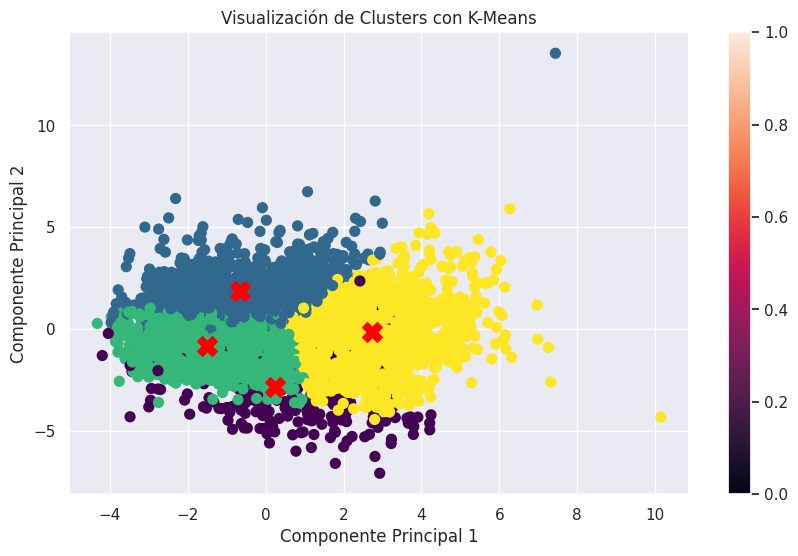

In [78]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

# Función para visualizar los clusters
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X')  # Marcadores para los centros
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title("Visualización de Clusters con K-Means")
    plt.colorbar()

# Preparación de los datos para la visualización
centroids_reduced = pca.transform(centroids)  # Reducir la dimensión de los centros también

# Llamada a la función de visualización
plt.figure(figsize=(10, 6))
plot_clusters(df_reduced, y_pred, centroids_reduced)
plt.show()


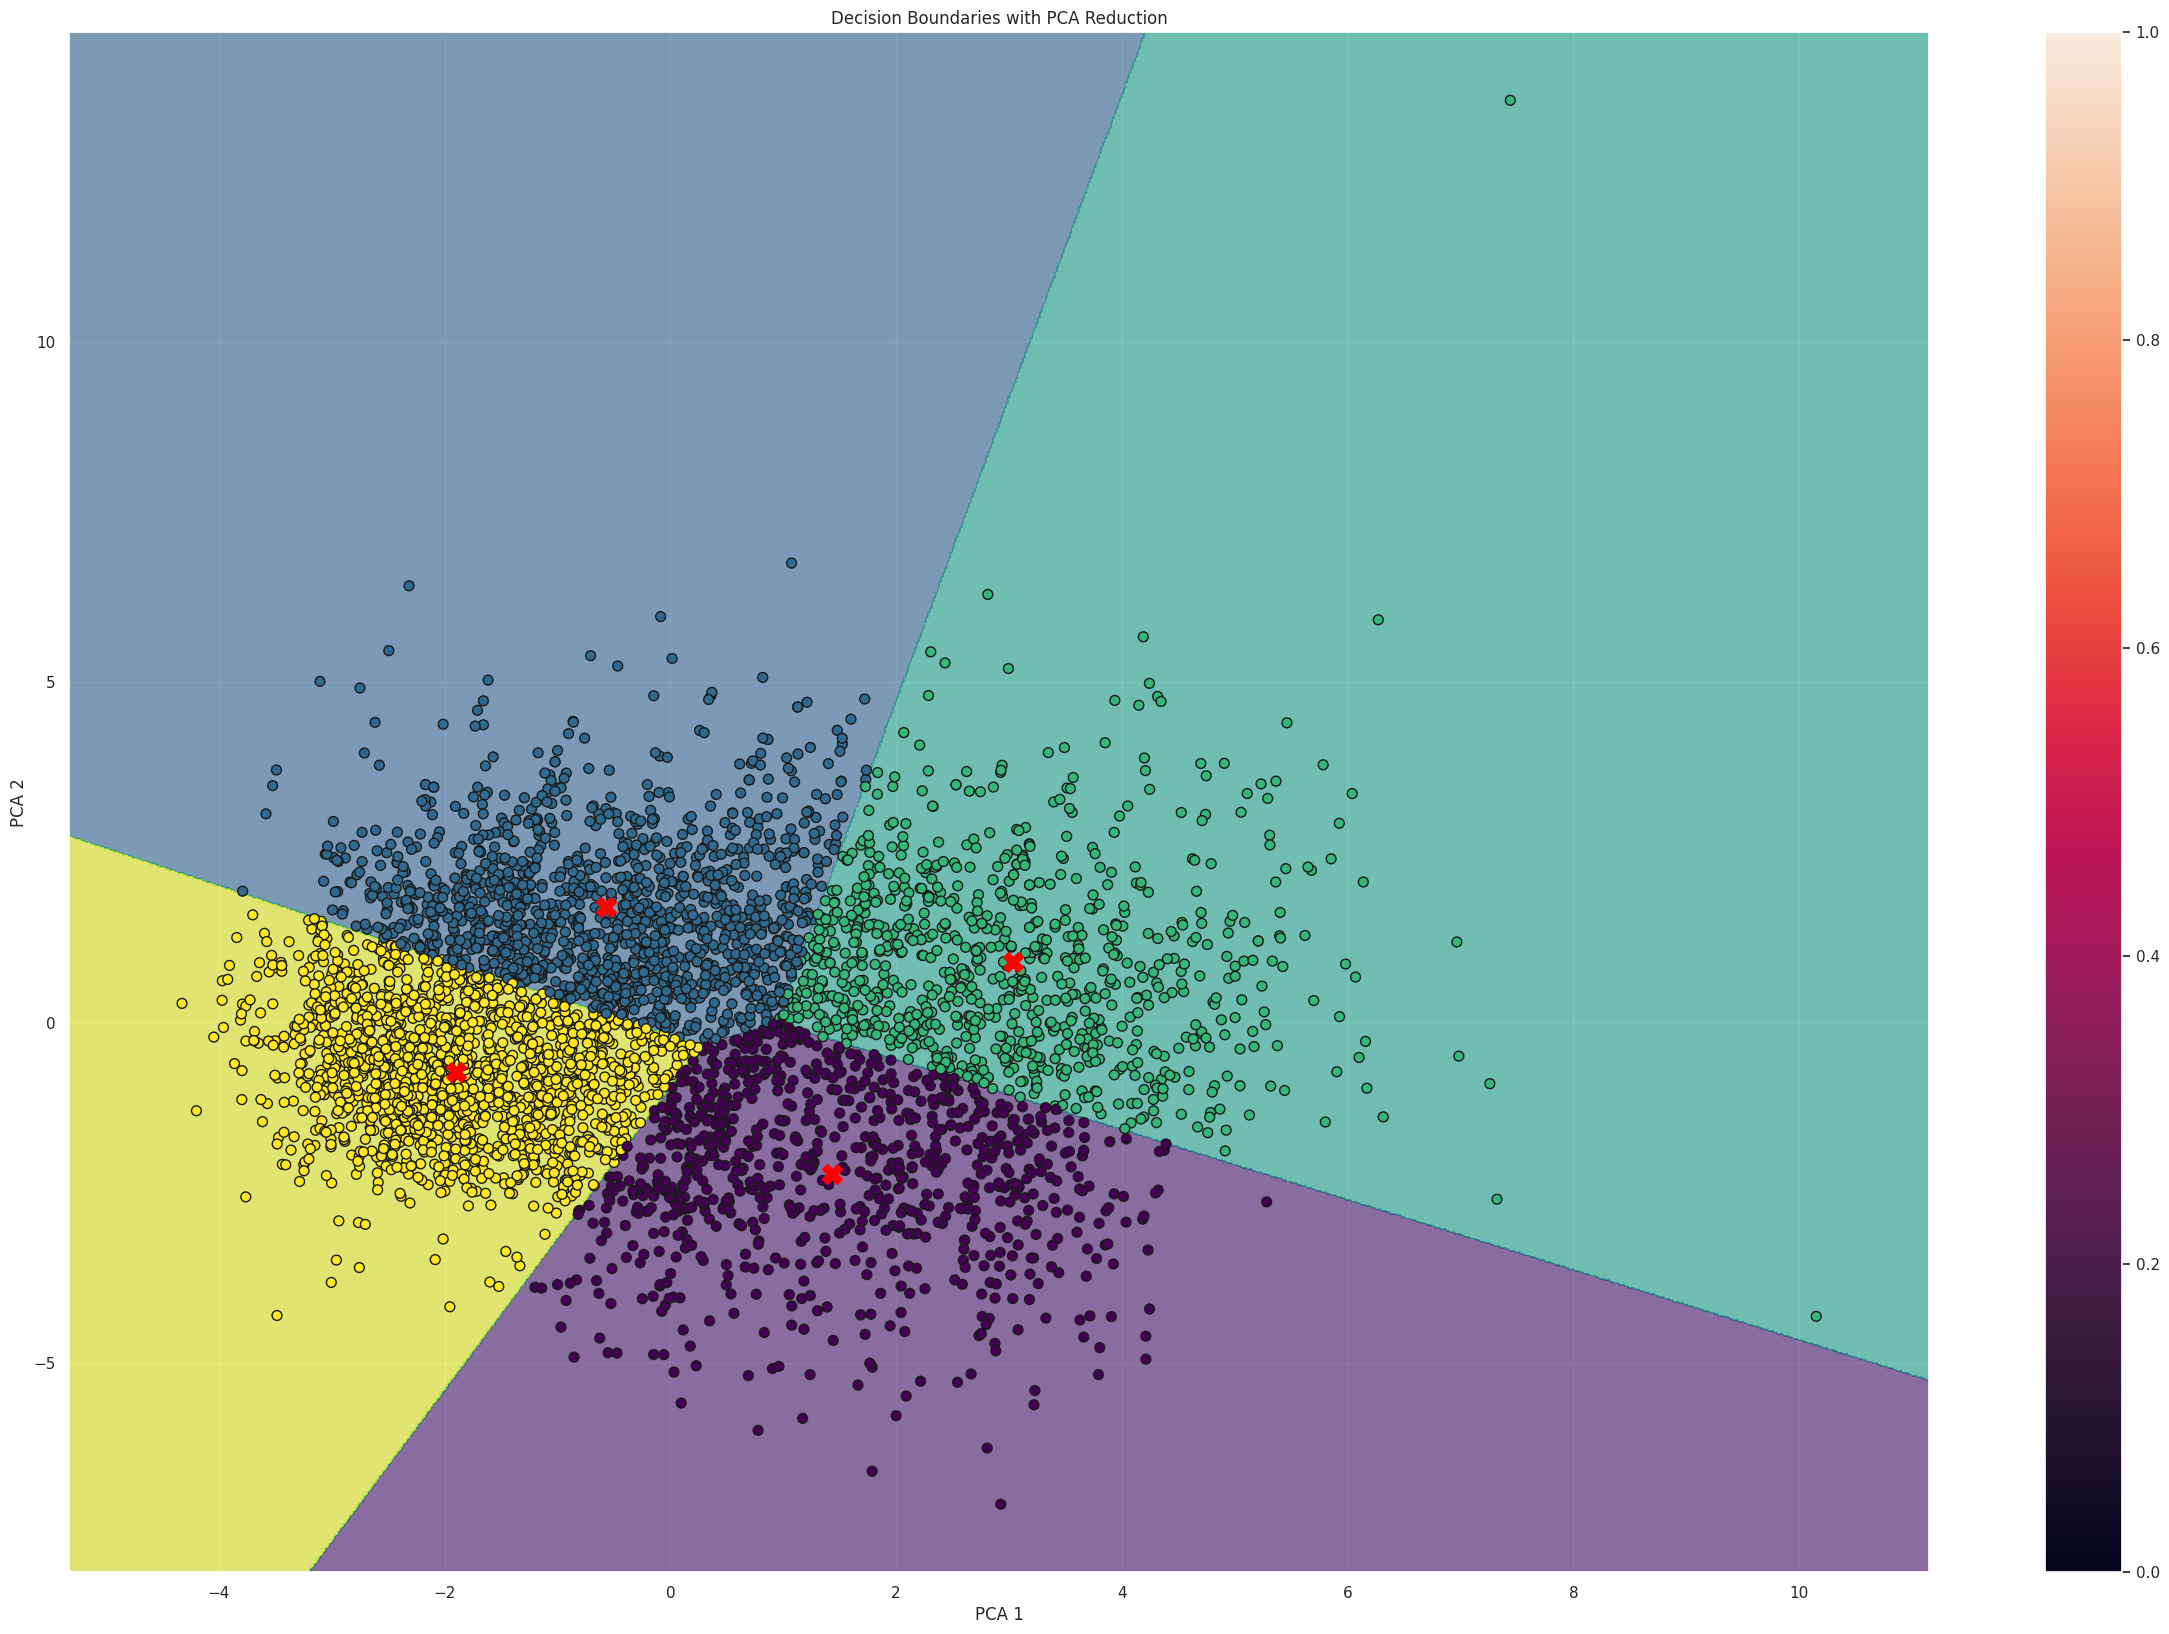

In [79]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA para reducción a dos dimensiones
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

# Aplicar K-Means con 4 clusters sobre los datos reducidos
kmeans = KMeans(n_clusters=4, random_state=SEED)
kmeans.fit(df_reduced)

# Función para visualizar los límites de decisión y los centroides
def plot_decision_boundaries(clusterer, X):
    # Genera una malla de puntos para cubrir el espacio de características
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    # Predecir los clusters para cada punto en la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualizar el resultado usando un color para cada cluster
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, s=50, cmap='viridis', edgecolors='k')
    plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=200, color='red', marker='X')  # Centroides
    plt.title("Decision Boundaries with PCA Reduction")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar()
    plt.show()

# Visualizar los límites de decisión y centroides
plot_decision_boundaries(kmeans, df_reduced)


##### Visualizar la Evolución del K-Means

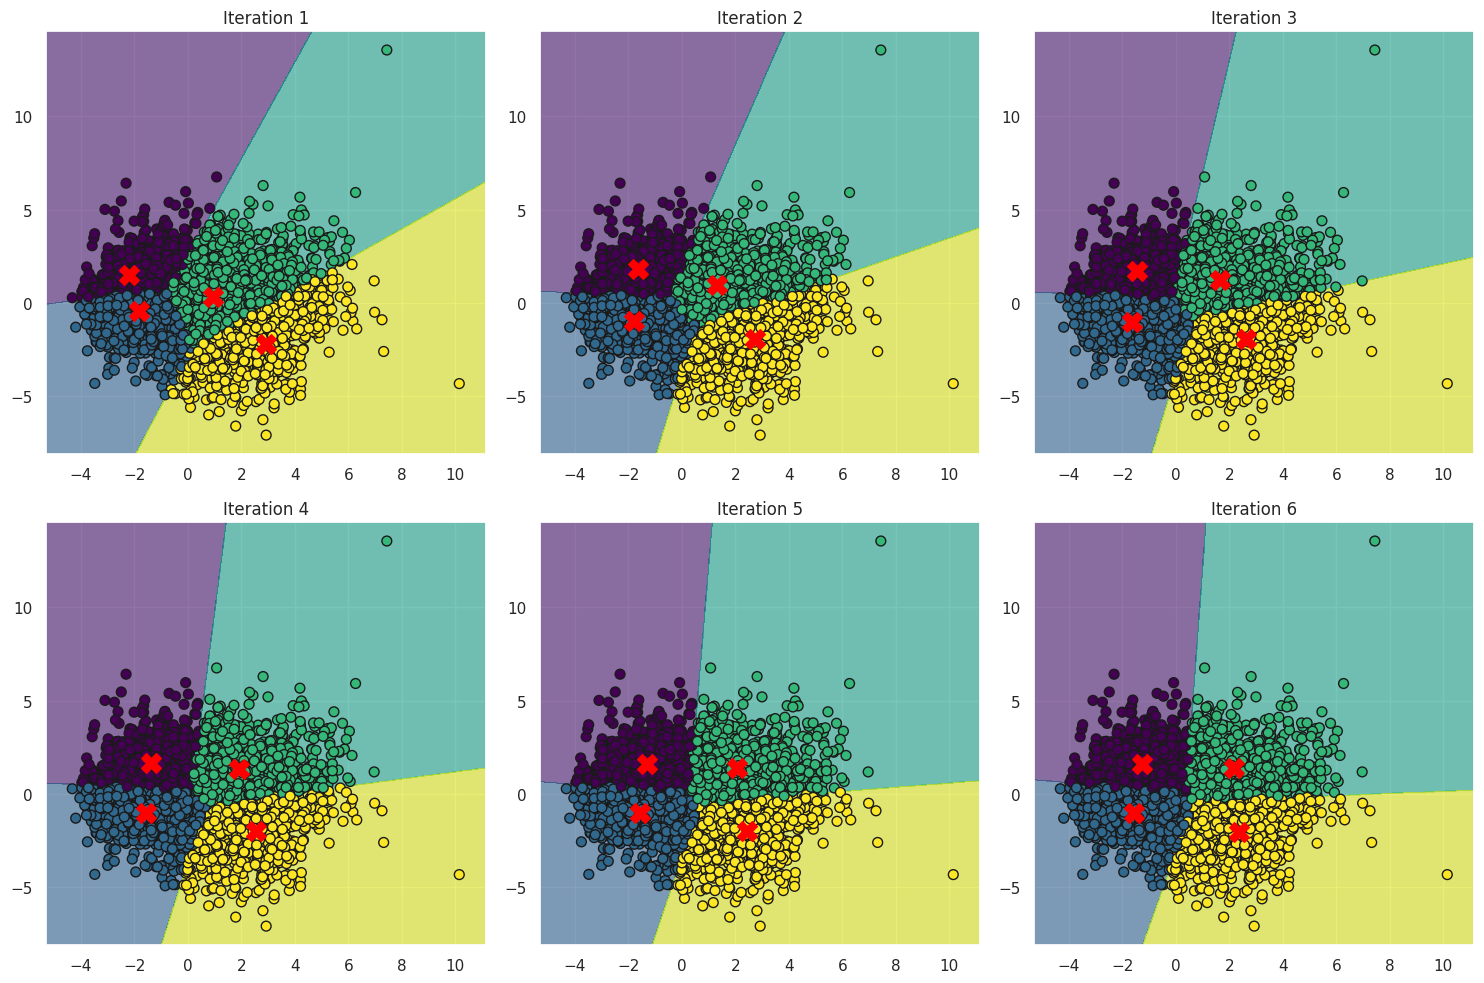

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Preparación de PCA y reducción de datos
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

def plot_kmeans_iterations(df_reduced, n_clusters, n_init, max_iters, random_state):
    # Configuración de los subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(1, max_iters + 1):
        # Instancia de KMeans con diferentes iteraciones máximas
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=n_init, max_iter=i, random_state=random_state)
        kmeans.fit(df_reduced)

        # Límites para la malla de visualización
        x_min, x_max = df_reduced[:, 0].min() - 1, df_reduced[:, 0].max() + 1
        y_min, y_max = df_reduced[:, 1].min() - 1, df_reduced[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

        # Predecir los clusters para cada punto en la malla
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Visualización de los límites de decisión
        axes[i-1].contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
        axes[i-1].scatter(df_reduced[:, 0], df_reduced[:, 1], c=kmeans.labels_, s=50, cmap='viridis', edgecolors='k')
        axes[i-1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', marker='X')
        axes[i-1].set_title(f'Iteration {i}')
        axes[i-1].set_xlim([x_min, x_max])
        axes[i-1].set_ylim([y_min, y_max])

    plt.tight_layout()
    plt.show()

plot_kmeans_iterations(df_reduced, n_clusters=4, n_init=1, max_iters=6, random_state=SEED)


Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

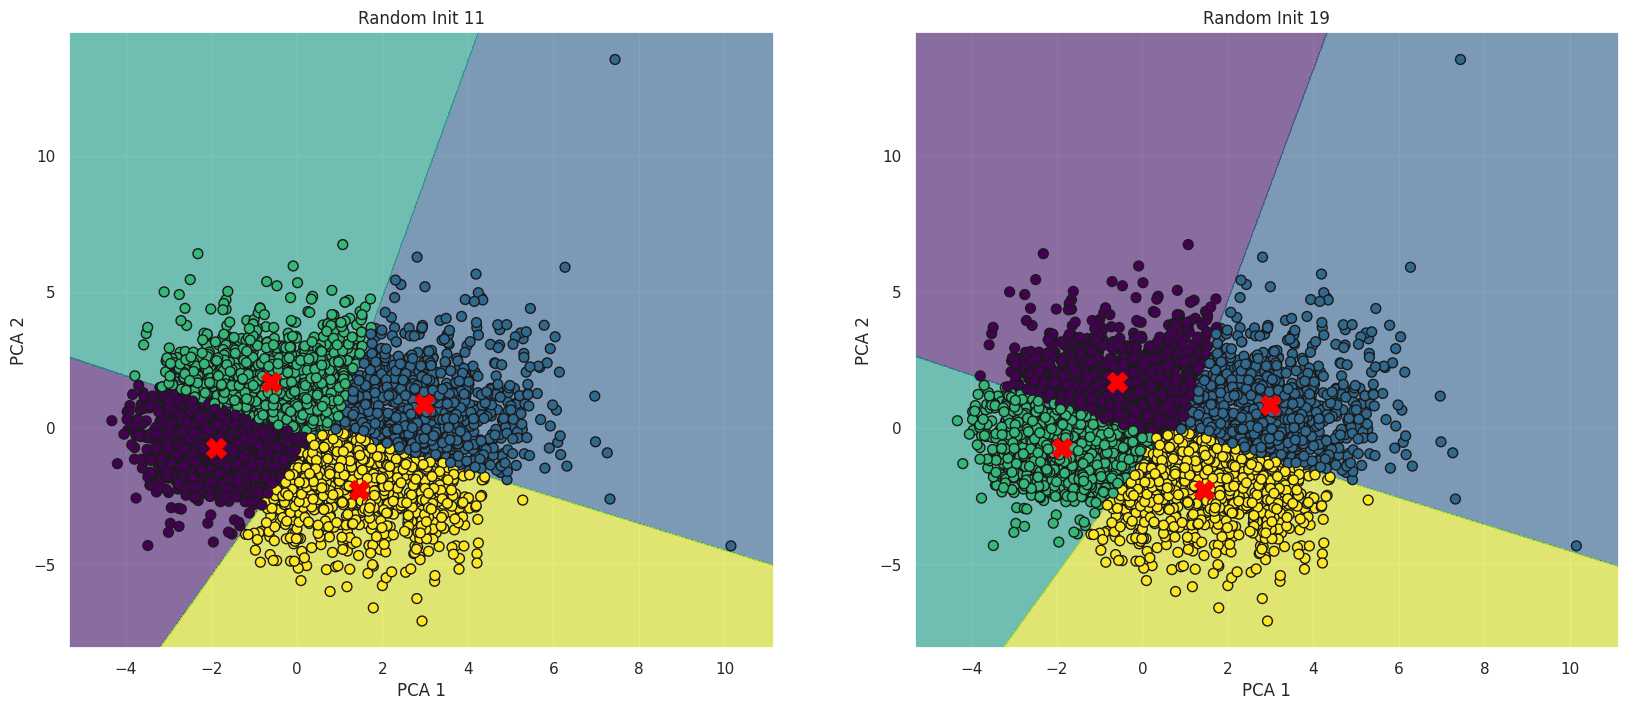

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

# Modificación de la función para aceptar un eje de Matplotlib
def plot_decision_boundaries(clusterer, X, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, s=50, cmap='viridis', edgecolors='k')
    ax.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=200, color='red', marker='X')
    ax.set_title("Decision Boundaries with PCA Reduction")
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Configuración de la comparación
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# KMeans con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1, max_iter=300, random_state=11)
kmeans_rnd_init1.fit(df_reduced)
plot_decision_boundaries(kmeans_rnd_init1, df_reduced, axs[0])
axs[0].set_title('Random Init 11')

kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1, max_iter=300, random_state=19)
kmeans_rnd_init2.fit(df_reduced)
plot_decision_boundaries(kmeans_rnd_init2, df_reduced, axs[1])
axs[1].set_title('Random Init 19')

plt.show()


In [82]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(df_reduced)

KMeans(algorithm='full', init='random', n_clusters=4, n_init=10,
       random_state=11)

In [83]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, df_reduced, axs[0])
plt.show()

<Figure size 800x400 with 0 Axes>